In [1]:
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
import numpy as np
import os
from PIL import Image

In /home/holic/miniconda3/envs/tf1.11/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/holic/miniconda3/envs/tf1.11/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/holic/miniconda3/envs/tf1.11/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
def stitch_count(instr_path, file_path):    
    img_files = []
    if file_path:
        for f_path in file_path:
            with open(f_path, "r") as f:
                img_f = f.read().splitlines()
                img_files.extend(img_f)
    else:
        img_files = os.listdir(instr_path)

    element_counts = Counter()
    for f in img_files:
        if f.endswith('.png'):
            img_path = os.path.join(instr_path, f)
        else:
            img_path = os.path.join(instr_path, f + '.png')
        img = np.array(Image.open(img_path)).astype(np.int32)

        cnt = Counter(img.flatten())
        element_counts += cnt
    return OrderedDict(sorted(element_counts.items()))


def ordered_dict_to_list(ordered_dict, num_classes):
    """
    Convert an OrderedDict to a list, filling missing class indices with zero.

    Parameters:
    - ordered_dict (OrderedDict): The input OrderedDict with class counts.
    - num_classes (int): The total number of classes.

    Returns:
    - list: A list of length `num_classes` with counts from the OrderedDict, filling missing indices with zero.
    """
    result_list = [0] * num_classes  # Initialize a list with zeros
    for key, value in ordered_dict.items():
        if key < num_classes:
            result_list[key] = value
    return result_list

In [3]:
# 名称对应表
names_front = ["FK", "BK", "T", "H", "M", "E", "V", "V(R)", "V(L)", "X(R)", "X(L)", "O(5)", "Y", "FO(2)"]
names_complete = ["FK", "BK", "T", "H,M", "M", "E,V(L)", "V,HM", "V(R)", "V(L)", "X(R)", "X(L)", "T(F)", 
                  "V,M", "T(B)", "M,H(B)", "E,V(R)", "V,FK", "FK,MAK", "FT,FKMAK", "FT,MBK", "M,BK", "M,FK", 
                  "V,BK", "VR,FKMAK", "H,BK", "VL,FKMAK", "AO(2)", "O(5),AK", "O(5),FKBK", "BO(2)", 
                  "O(5),BK", "Y,MATBK", "FO(2)", "V,MH(B)"]

## total

In [4]:
stitch_front = stitch_count('../dataset/instruction-front',[])
stitch_complete = stitch_count('../dataset/instruction-complete',[])
print(stitch_front)
print(stitch_complete)

OrderedDict([(0, 4908779), (1, 887212), (2, 133797), (3, 94733), (4, 104033), (5, 166), (6, 1471), (7, 138689), (8, 145304), (9, 23835), (10, 23886), (11, 18933), (12, 22904), (13, 11858)])
OrderedDict([(0, 4155818), (1, 829890), (2, 9316), (3, 77251), (4, 71403), (5, 85566), (6, 5199), (7, 51722), (8, 57825), (9, 23835), (10, 23886), (11, 138872), (12, 1075), (13, 16102), (14, 5406), (15, 85525), (16, 139887), (17, 536224), (18, 65413), (19, 2406), (20, 4136), (21, 7944), (22, 24397), (23, 1756), (24, 23014), (25, 2277), (26, 9948), (27, 7767), (28, 7294), (29, 6444), (30, 7744), (31, 22904), (32, 7324), (33, 30)])


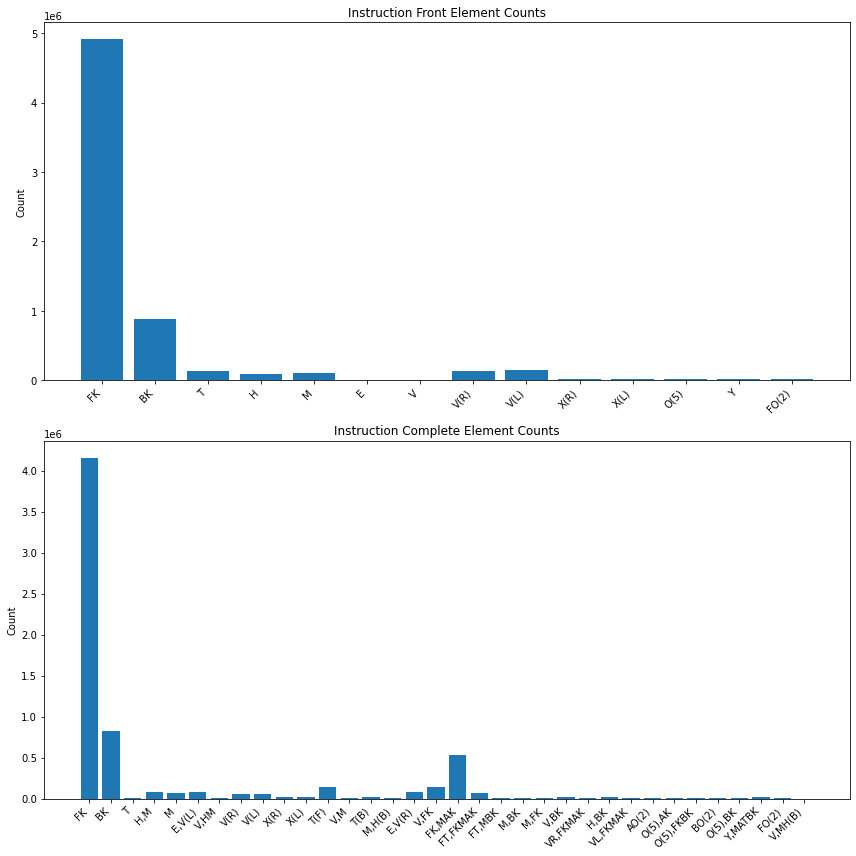

In [5]:
# 绘制柱状图
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# 绘制第一个柱状图（front）
counts_front = ordered_dict_to_list(stitch_front, 14)
axes[0].bar(names_front, counts_front)
axes[0].set_title('Instruction Front Element Counts')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(names_front, rotation=45, ha='right')

# 绘制第二个柱状图（complete）
counts_complete = ordered_dict_to_list(stitch_complete, 34)
axes[1].bar(names_complete, counts_complete)
axes[1].set_title('Instruction Complete Element Counts')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(names_complete, rotation=45, ha='right')

plt.tight_layout()
plt.show()


## balanced

In [6]:
j_cnt = OrderedDict([('1j', 0), ('2j', 0), ('3j', 0), ('4j', 0)])
with open('../dataset/test_real.txt', 'r') as f:
    for line in f:
        prefix = line.strip().split('_')[0]
        if prefix in ('2j', '3j', '4j'):
            j_cnt[prefix] += 1
        else:
            j_cnt['1j'] += 1
            
j_cnt

OrderedDict([('1j', 3000), ('2j', 600), ('3j', 775), ('4j', 575)])

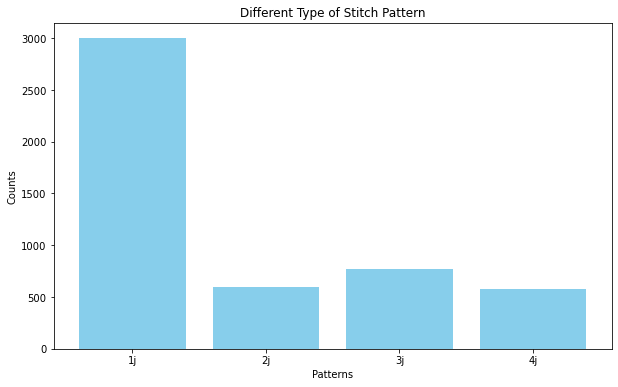

In [7]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(['1j', '2j', '3j', '4j'], [j for i, j in j_cnt.items()], color='skyblue')

# Add labels and title
plt.xlabel('Patterns')
plt.ylabel('Counts')
plt.title('Different Type of Stitch Pattern')

# Display the plot
plt.show()

In [8]:
stitch_front = stitch_count('../dataset/instruction-front', ['../dataset/test_real.txt'])
stitch_complete = stitch_count('../dataset/instruction-complete', ['../dataset/test_real.txt'])
print(stitch_front)
print(stitch_complete)

OrderedDict([(0, 1484133), (1, 209577), (2, 87510), (3, 41059), (4, 37223), (5, 166), (6, 1471), (7, 25359), (8, 25733), (9, 7031), (10, 7043), (11, 18933), (12, 22904), (13, 11858)])
OrderedDict([(0, 920228), (1, 183030), (2, 4178), (3, 15618), (4, 22342), (5, 15901), (6, 1179), (7, 8214), (8, 7919), (9, 7031), (10, 7043), (11, 25024), (12, 265), (13, 1030), (14, 476), (15, 15703), (16, 27398), (17, 536224), (18, 65413), (19, 2406), (20, 4136), (21, 7944), (22, 4826), (23, 1756), (24, 23014), (25, 2277), (26, 9948), (27, 7767), (28, 7294), (29, 6444), (30, 7744), (31, 22904), (32, 7324)])


In [9]:
stitch_front[0]/ sum([v for k, v in stitch_front.items()])

0.7495621212121212

In [10]:
stitch_complete[0]/ sum([v for k, v in stitch_complete.items()])

0.46476161616161615

In [11]:
stitch_complete[17]/ sum([v for k, v in stitch_complete.items()])

0.270820202020202

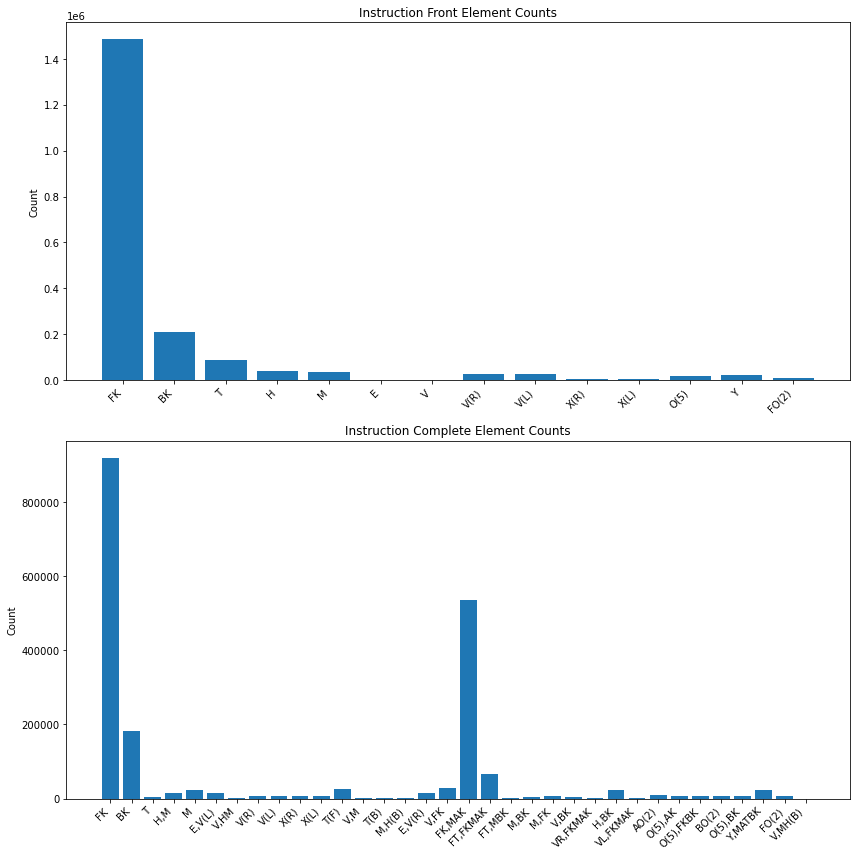

In [9]:
# 绘制柱状图
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# 绘制第一个柱状图（front）
counts_front = ordered_dict_to_list(stitch_front, 14)
axes[0].bar(names_front, counts_front)
axes[0].set_title('Instruction Front Element Counts')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(names_front, rotation=45, ha='right')

# 绘制第二个柱状图（complete）
counts_complete = ordered_dict_to_list(stitch_complete, 34)
axes[1].bar(names_complete, counts_complete)
axes[1].set_title('Instruction Complete Element Counts')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(names_complete, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## show stitch

In [75]:
def stitch_show(instr_path, file_path, label, num_files):    
    img_files = []
    if file_path:
        for f_path in file_path:
            with open(f_path, "r") as f:
                img_f = f.read().splitlines()
                img_files.extend(img_f)
    else:
        img_files = os.listdir(instr_path)

    i = 0
    for f in img_files:
        if f.endswith('.png'):
            img_path = os.path.join(instr_path, f)
        else:
            img_path = os.path.join(instr_path, f + '.png')
        img = np.array(Image.open(img_path)).astype(np.int32)
        found = np.where(img == label)
        row = found[0]
        col = found[1]
        if len(row) > 0:
            print(img_path)
            print(list(zip(row, col)))
            i += 1
            if i == num_files:
                break

In [93]:
stitch_show('../dataset/instruction-front', ['../dataset/test_real.txt'], 8, 2)

../dataset/instruction-front/Cable1_050_0_0.png
[(4, 6), (4, 8), (6, 5), (6, 7), (6, 9), (8, 6), (8, 8), (10, 7)]
../dataset/instruction-front/Cable1_050_0_6.png
[(12, 8), (14, 7), (14, 9), (16, 6), (16, 8), (16, 10), (18, 7), (18, 9)]
